In [1]:
import pandas as pd
import scanpy as sc

In [2]:
def get_num(celltype):
    inputPath='/mnt/ruiyanhou/nfs_share2/three_primer/ESCC/ERCC_part/run_BRIE/Brie_out/brie_ERCC_'+celltype+'.brie_ident.tsv'
    celltypedf=pd.read_csv(inputPath,delimiter='\t')
    significantgene=celltypedf[celltypedf['disease_Tumor_FDR']<0.01]
    sign_shorter_num=len(significantgene[significantgene['disease_Tumor_ceoff']>0])
    sign_longer_num=len(significantgene[significantgene['disease_Tumor_ceoff']<0])
    return sign_shorter_num, sign_longer_num

In [3]:
celltypels=["B_cells","T_cells","pDC","Mast_cells","Plasma_cells","Myeloid_cells","Cycling_cells","Endothelial_cells","Epithelial_cell","Fibroblasts","Smooth_muscle_cells"]


In [4]:
celltype_genenumdict={}
for celltype in celltypels:
    signshorter_num,sign_loner_num=get_num(celltype)
    celltype_genenumdict[celltype]=[signshorter_num,sign_loner_num]

In [5]:
celltype_genenumdict

{'B_cells': [126, 32],
 'T_cells': [264, 82],
 'pDC': [0, 1],
 'Mast_cells': [2, 1],
 'Plasma_cells': [112, 33],
 'Myeloid_cells': [238, 66],
 'Cycling_cells': [24, 6],
 'Endothelial_cells': [115, 26],
 'Epithelial_cell': [183, 61],
 'Fibroblasts': [427, 115],
 'Smooth_muscle_cells': [67, 66]}

In [6]:
celltypenum=pd.DataFrame(celltype_genenumdict)
celltypenum

,B_cells,T_cells,pDC,Mast_cells,Plasma_cells,Myeloid_cells,Cycling_cells,Endothelial_cells,Epithelial_cell,Fibroblasts,Smooth_muscle_cells
0,126,264,0,2,112,238,24,115,183,427,67
1,32,82,1,1,33,66,6,26,61,115,66


In [7]:
celltypenum=celltypenum.T
celltypenum

,0,1
B_cells,126,32
T_cells,264,82
pDC,0,1
Mast_cells,2,1
Plasma_cells,112,33
Myeloid_cells,238,66
Cycling_cells,24,6
Endothelial_cells,115,26
Epithelial_cell,183,61
Fibroblasts,427,115


In [8]:
celltypenum.index=[i.replace('_',' ') for i in celltypenum.index]
celltypenum

,0,1
B cells,126,32
T cells,264,82
pDC,0,1
Mast cells,2,1
Plasma cells,112,33
Myeloid cells,238,66
Cycling cells,24,6
Endothelial cells,115,26
Epithelial cell,183,61
Fibroblasts,427,115


In [9]:
celltypenum.columns=['enhanced proximal PAS','enhanced distal PAS']
celltypenum

,enhanced proximal PAS,enhanced distal PAS
B cells,126,32
T cells,264,82
pDC,0,1
Mast cells,2,1
Plasma cells,112,33
Myeloid cells,238,66
Cycling cells,24,6
Endothelial cells,115,26
Epithelial cell,183,61
Fibroblasts,427,115


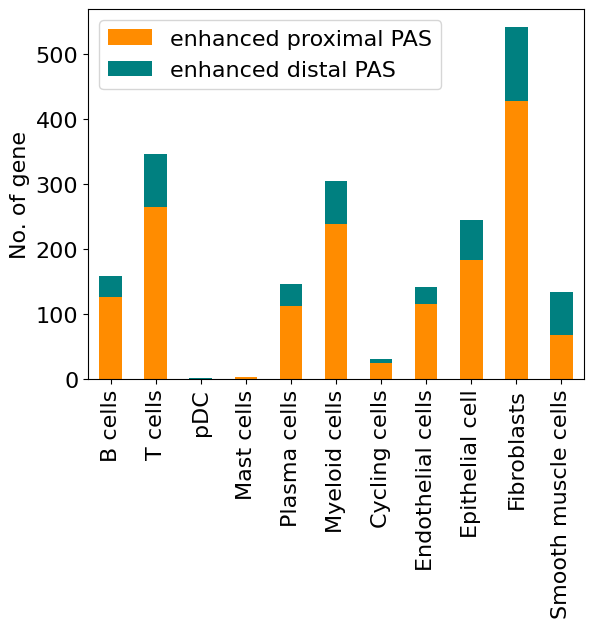

In [10]:
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 16

plot=celltypenum.plot(kind='bar', stacked=True, color=['darkorange', 'teal'])
plt.ylabel('No. of gene')
plt.xticks(rotation=90)
plt.legend( loc='upper left')
fig = plot.get_figure()
#fig.savefig('/mnt/ruiyanhou/nfs_share2/three_primer/ESCC/figure/stack_barplot.pdf',dpi=300,bbox_inches='tight')
plt.show()